In [3]:
import importlib
import kex_data
import numpy as np
import interfile
import matplotlib.pyplot as plt

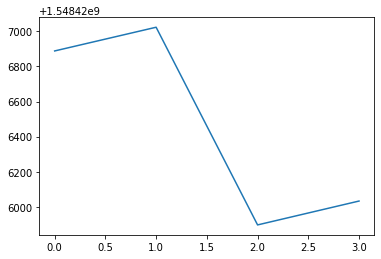

In [4]:
plt.plot(kex_data.RECON_DCR)

In [6]:
hdrs = kex_data.get_sino_hdrs()
hdr_infos = [interfile.load(path) for path in hdrs]

In [11]:
for k,v in hdr_infos[0].items():
    print(k,v)

comment {'value': 'Created from listmode data', 'unit': None, 'type': None, 'listindex': None, 'obligatory': False}
originating system {'value': 1104, 'unit': None, 'type': None, 'listindex': None, 'obligatory': True}
SMS-MI header name space {'value': 'sinogram subheader', 'unit': None, 'type': None, 'listindex': None, 'obligatory': False}
SMS-MI version number {'value': 3.5, 'unit': None, 'type': None, 'listindex': None, 'obligatory': False}
GENERAL DATA {'value': None, 'unit': None, 'type': None, 'listindex': None, 'obligatory': True}
listmode header file {'value': 'C:\\Users\\petct\\Desktop\\CylinderPET-Converted\\CylinderPET-LM-00\\CylinderPET-LM-00.hdr', 'unit': None, 'type': None, 'listindex': None, 'obligatory': False}
listmode data file {'value': 'C:\\Users\\petct\\Desktop\\CylinderPET-Converted\\CylinderPET-LM-00\\CylinderPET-LM-00.l', 'unit': None, 'type': None, 'listindex': None, 'obligatory': False}
name of data file {'value': 'CylinderPET-LM-00-sino-0.s', 'unit': None, 't

In [62]:
ref = 2


time_keys = []
tags = ['tim', 'dur', 'date']
irrelevant = ['number of TOF time bins', 'tracer activity at time of injection']
for k in hdr_infos[ref]:
    skip = False
    for irr in irrelevant:
        skip = k == irr
        if skip:
            break        
    if not skip:        
        for tag in tags:
            if k.find(tag) != -1:
                    time_keys.append(k)
                    print(k, hdr_infos[ref][k])
                    break
print("time_keys\n", time_keys)

study date {'value': '2019:01:25', 'unit': 'yyyy:mm:dd', 'type': None, 'listindex': None, 'obligatory': False}
study time {'value': '14:18:17', 'unit': 'hh:mm:ss GMT+00:00', 'type': None, 'listindex': None, 'obligatory': False}
tracer injection date {'value': '2019:01:25', 'unit': 'yyyy:mm:dd', 'type': None, 'listindex': None, 'obligatory': False}
tracer injection time {'value': '14:05:48', 'unit': 'hh:mm:ss GMT+00:00', 'type': None, 'listindex': None, 'obligatory': False}
relative time of tracer injection {'value': 151370052, 'unit': 'sec', 'type': None, 'listindex': None, 'obligatory': False}
image duration {'value': 60, 'unit': 'sec', 'type': None, 'listindex': None, 'obligatory': True}
image relative start time {'value': 0.0, 'unit': 'sec', 'type': None, 'listindex': None, 'obligatory': True}
image duration from timing tags {'value': 60014, 'unit': 'msec', 'type': None, 'listindex': None, 'obligatory': False}
time_keys
 ['study date', 'study time', 'tracer injection date', 'tracer 

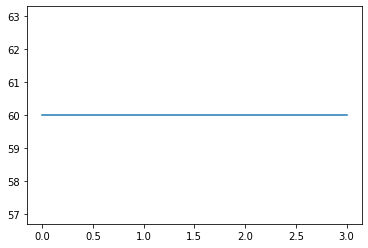

(60000, 60030)

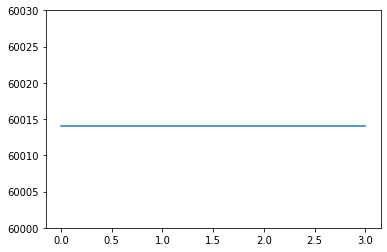

In [41]:
duration_s = [info['image duration']['value'] for info in hdr_infos]
plt.plot(duration_s)
plt.show()
duration_ms = [info['image duration from timing tags']['value'] for info in hdr_infos]
plt.plot(duration_ms)
plt.ylim(60*1000, 60*1000+30)


In [80]:
times = ['14:18:17', '14:05:48']
times = [s.split(':') for s in times]
times = [[int(s) for s in seq] for seq in times]
A = np.array(times)
print(A)
seconds = [60*60*24, 60, 1]
diff = np.sum(A[0]*seconds - A[1]*seconds)
print(diff)
my_dcr = hdr_infos[0]['relative time of tracer injection']['value'] + diff
print([my_dcr])
print(kex_data.RECON_DCR)
print(diff/60)

[[14 18 17]
 [14  5 48]]
749
[151370801]
[1548426888, 1548427023, 1548425897, 1548426033]
12.483333333333333


In [79]:
diff_s = (kex_data.RECON_DCR[1]-kex_data.RECON_DCR[0])
print( diff_s)
diff_m = diff_s / 60
print(diff_m)

135
2.25


In [92]:
diff = np.array(kex_data.RECON_DCR) - hdr_infos[0]['relative time of tracer injection']['value'] 
diff_m = diff/60
print("diff minute", diff_m)
diff_d = diff_m / (60*24)
print("diff day", diff_d)
diff_y = diff_d / 365
print("diff year", diff_y)
print(2019-1970)

diff minute [23284280.6        23284282.85       23284264.08333333 23284266.35      ]
diff day [16169.63930556 16169.64086806 16169.62783565 16169.62940972]
diff year [44.30038166 44.30038594 44.30035023 44.30035455]
49


In [85]:
print(hdr_infos[2]['tracer injection time'], "\n")
for info in hdr_infos:
    print(info['study time'])

{'value': '14:05:48', 'unit': 'hh:mm:ss GMT+00:00', 'type': None, 'listindex': None, 'obligatory': False} 

{'value': '14:34:48', 'unit': 'hh:mm:ss GMT+00:00', 'type': None, 'listindex': None, 'obligatory': False}
{'value': '14:37:03', 'unit': 'hh:mm:ss GMT+00:00', 'type': None, 'listindex': None, 'obligatory': False}
{'value': '14:18:17', 'unit': 'hh:mm:ss GMT+00:00', 'type': None, 'listindex': None, 'obligatory': False}
{'value': '14:20:33', 'unit': 'hh:mm:ss GMT+00:00', 'type': None, 'listindex': None, 'obligatory': False}


In [49]:
import datetime

In [54]:
datekeys = ['year', 'month', 'day']
values = [info['tracer injection date']['value'].split(':') for info in hdr_infos]
values = [[int(k) for k in seq] for seq in values]
dates = [datetime.date(**dict(zip(datekeys, v))) for v in values]
print(dates)

[datetime.date(2019, 1, 25), datetime.date(2019, 1, 25), datetime.date(2019, 1, 25), datetime.date(2019, 1, 25)]


In [ ]:
timekeys = ['hour', 'minute', 'second', 'tzinfo']
values = [info['tracer injection time']['value'].split(':') for info in hdr_infos]
values = [[int(k) for k in seq] for seq in values]
values

In [ ]:
# documentation:
# e7_recon
# ...
#  --dcr   decay correction reference time. The images are corrected using this
#          time as the reference. The time is specified in seconds relative to
#          1.1.1970, 00:00:00,GMT-0 in seconds.